In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, AncillaRegister
from qiskit.circuit import QuantumCircuit


qreg_q = QuantumRegister(2, 'q')
qreg_a = AncillaRegister(1, 'a')
creg_c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(qreg_q, qreg_a, creg_c)
circuit.x(qreg_a[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_a[0])
circuit.barrier()

oracle = QuantumCircuit(3)
oracle.ccx(0, 1, 2) # 11 is a good state
oracle.barrier()
qc = oracle.compose(circuit, front=True)


In [2]:
from qiskit.quantum_info import Statevector
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)
# Evolve the state by the quantum circuit
state = state.evolve(qc)
#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

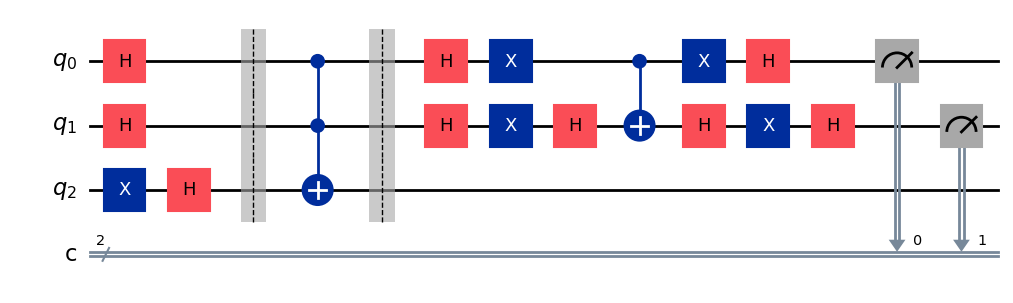

In [3]:
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(0)
qc.h(1)
#grover_op = GroverOperator(oracle)

# qc = circuit.compose(grover_op, range(2), front=False)
#qc = circuit.compose(grover_op.decompose(), range(3), front=False)

qc.measure(range(2), range(2))
qc.draw('mpl')

In [4]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
backend = AerSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)
# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'11': 1024}
